In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

In [2]:
iris = load_iris()

## Iris data: classes

In [3]:
print("classes", iris.target_names)

classes ['setosa' 'versicolor' 'virginica']


## Iris data: features
![features](notebook_images/iris.png)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## considering only two features since it is easy to visualize in 2D

In [5]:
X = iris.data[:, :2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [6]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Class distribution

In [7]:
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [8]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=222)

In [9]:
print(x_train.shape, y_train.shape)

(120, 2) (120,)


In [10]:
print(x_val.shape, y_val.shape)

(30, 2) (30,)


## Sklearn - Logistic regression

In [11]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_preds = logreg.predict(x_val)
y_preds_train = logreg.predict(x_train)

## Validation accuracy

In [13]:
print(accuracy_score(y_val, y_preds))

0.7


In [14]:
## Getting probability instead of just the class labels
logreg.predict_proba(x_val)

array([[7.43060389e-01, 2.31332550e-01, 2.56070613e-02],
       [9.14479330e-01, 7.94338001e-02, 6.08686979e-03],
       [5.69915101e-02, 3.69094940e-01, 5.73913550e-01],
       [4.53935082e-03, 7.94687772e-01, 2.00772877e-01],
       [1.28968132e-01, 6.39994118e-01, 2.31037750e-01],
       [1.22611224e-02, 5.33906045e-01, 4.53832833e-01],
       [3.10567797e-01, 6.50093374e-01, 3.93388285e-02],
       [1.15817175e-02, 4.64308027e-01, 5.24110255e-01],
       [8.86780467e-03, 5.65290994e-01, 4.25841201e-01],
       [3.54753715e-02, 7.44396779e-01, 2.20127849e-01],
       [2.14629565e-02, 4.01494959e-01, 5.77042085e-01],
       [6.90717759e-02, 6.76293919e-01, 2.54634305e-01],
       [2.18117180e-05, 1.32845383e-01, 8.67132806e-01],
       [7.50341739e-01, 1.20575937e-01, 1.29082323e-01],
       [4.82523082e-03, 3.23511581e-01, 6.71663188e-01],
       [6.48969405e-03, 2.97217670e-01, 6.96292636e-01],
       [5.89353317e-04, 1.75730531e-01, 8.23680115e-01],
       [8.68977765e-01, 9.85086

## Decision boundary

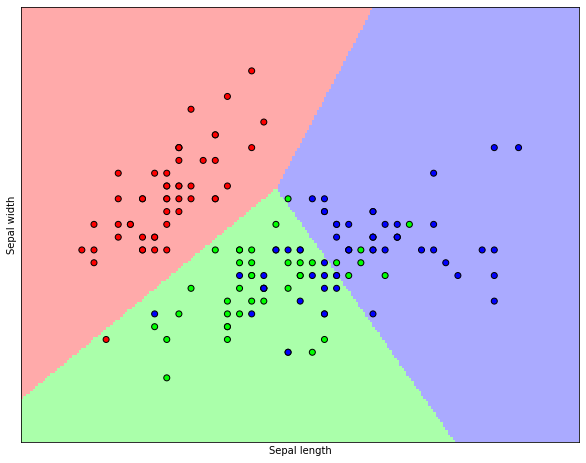

In [15]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap_bold)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()